# Introduction to Machine Learning
------------------------------

Rebecca Mackenzie <br><br>
(Data Scientist at STFC)

<center><img src="./img/AboutMe.png"/><center>

# What is machine learning?

* “A subset of artificial intelligence … uses statistical techniques to give computers the ability to learn without being explicitly programmed”
* Often overlaps with computational statistics – prediction making through the use of computers
* If supervised – the model is ‘trained’
* If unsupervised – the model is given lots of data and must find patterns and relationships within
<center>
<img src="https://amp.insider.com/images/5beafd0f48eb12015655cf72-750-562.jpg" width=150/> 
</center>

# Machine Learning

* The general problem for machine learning is as follows. It is desired to learn an unknown function <br>
$$𝑓:𝑋 →𝑌$$
<br>
* Where there is an unknown probability distribution $𝑝$ on $𝑋$. 
* If $𝑌=𝑅$ (where $𝑅$ is a real value) it is called a regression problem.
* If $𝑌={𝑇𝑟𝑢𝑒 |  𝐹𝑎𝑙𝑠𝑒}$ it is a classification problem

# Regression

* An algorithm that implements regression, mapping data to a continuous value.
* Investigates the relationship between a dependent (target) and independent variable(s) (predictor)
$$Y = R$$ 

Where $R$ is a real value.

<center>
<img src="./img/Regression.png" />
<center>

# Classification

An algorithm that implements classification, mapping data input into a category.

$$ Y = {True | False} $$


<center>
<img src="./img/Classification.png" />
</center>

# Real life examples (in science)

1. LSST Telescopic data
2. Identifying clouds in satellite images

## LSST Telescope

https://www.kaggle.com/c/PLAsTiCC-2018    
The Large Synaptic Survey Telescope has been built in Chile. When runnning in 2020, LSST will use an 8 meter telescope, with a 3 billion pixel camera
to image the entire Southern sky roughly every few nights and over a ten-year duration.    
<img src="./img/md_0ipHDU0F8Pdq.png" height=25% width=25%/>

This equates to:
* 200,000 pictures (1.28 petabytes uncompressed) per year
* Requiring 250 teraflops and 100 petabytes of storage
* 1 petabyte = 1,000 terabytes
* 100 petabytes = 100,000 terabytes

<center><img src="./img/lsst_example.png" /></center>

# Identifying clouds in satellite images

* In a satellite image, we may be interested in the underlying landscape, or the cloud in particular.
* This is important for projects including:
    * Deforestation
    * How quickly is the ice melting at the polar caps? (Difference between snow/ice and cloud)
    * Calculation of sea surface temperature (Cloud can bias this!)

<p>
    <left><img src="./img/clouds1.png" height=600 width=400/>Cloud cover over a sheet of ice</left>
    <right><img src="./img/glint.png" height=600 width=400/>Sun glint that can be mistaken for cloud</right></p>

# Using code

1. Python
2. Pandas
3. Sklearn

# Python

Nice, easily readable language. 

Many packages available to perform machine learning with, e.g. pandas and sklearn.

In [1]:
x = 1
y = 2

print(x + y) 

3


In [2]:
x = 1
y = 2

def multiply(x,y):
    return x*y

multiply(x,y)

2

# Pandas

"Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language." 
<img src="https://pandas.pydata.org/_static/pandas_logo.png" />

In [3]:
import pandas as pd

data = pd.read_csv("./data/lineardata.csv")

data.head()

,X,Y
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


Count the number of entries in each column

In [4]:
data.count()

X    11
Y    11
dtype: int64

Give summary statistics about the data

In [5]:
data.describe()

,X,Y
count,11.000000,11.00000
mean,6.000000,12.00000
std,3.316625,6.63325
min,1.000000,2.00000
25%,3.500000,7.00000
50%,6.000000,12.00000
75%,8.500000,17.00000
max,11.000000,22.00000


Plot the data.

What is the relationship between X and Y?

In [6]:
data.plot("X","Y")

# What is the relationship between X and Y?

This is the question that most (if not all) machine learning begins with.

* "If I know X, can I predict Y?"

* "Is X a good predictor of Y?"

* "How good is my model?"


 <center>
<img src="./img/ML_workflow.png" />
</center>

Let's have a look at some example data. 
We'll use sklearn.

In [7]:
from sklearn import datasets

data = datasets.load_iris()

#Convert to a pandas dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Type"] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


What does our data look like?

In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df["Type"].unique()

array([0, 1, 2], dtype=int64)

In [10]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

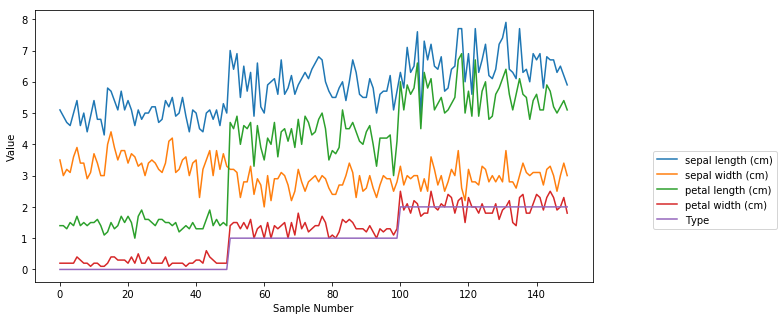

In [11]:
#import matplotlib
import matplotlib.pyplot as plt

#create blank figure
plt.figure(figsize=(10,5))
#add a line plot for our data
plt.plot(df)
#add a legend, place it somewhere nice
plt.legend(df, bbox_to_anchor=(1.1,0.5))
#add some labels
plt.xlabel("Sample Number")
plt.ylabel("Value")
#show the finished product
plt.show()

Already, it looks like petal length and petal width correlate with the Type of flower.

Splitting into training, validation and test:

In [12]:
from sklearn.model_selection import train_test_split

#print how many samples we have
print(len(df))

train_val, test = train_test_split(df, train_size=100, test_size=50, random_state=1)
train, val = train_test_split(train_val, train_size=50, test_size=50, random_state=1)

print("\nAfter splitting:")
print("Train size: %i" % len(train))
print("Val size: %i" % len(val))
print("Test size: %i" % len(test))

150

After splitting:
Train size: 50
Val size: 50
Test size: 50


In [13]:
features = train.drop("Type",axis=1)

features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.000000,50.000000,50.000000,50.000000
mean,5.790000,3.048000,3.802000,1.254000
std,0.805403,0.410694,1.748526,0.786418
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.300000,1.300000
75%,6.375000,3.300000,5.100000,1.900000
max,7.700000,4.400000,6.700000,2.500000


In [14]:
from sklearn.preprocessing import StandardScaler

#Scales by removing the mean and scaling to unit variance
scaler = StandardScaler()

#transform the data
scaled_features = scaler.fit_transform(features)
#do the same for validation and test
scaled_val_features = scaler.transform(val.drop("Type",axis=1))
scaled_test_features = scaler.transform(test.drop("Type",axis=1))

#How does the std and mean differ now?
pd.DataFrame(scaled_features, columns=features.columns).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.136313e-15,-9.381385e-17,-5.351275e-16,2.975398e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.868789e+00,-2.577687e+00,-1.560990e+00,-1.482311e+00
25%,-8.654121e-01,-6.099869e-01,-1.272132e+00,-1.096962e+00
50%,-1.128798e-01,-1.180620e-01,2.877029e-01,5.908693e-02
75%,7.337190e-01,6.198254e-01,7.498762e-01,8.297860e-01
max,2.395561e+00,3.325412e+00,1.674223e+00,1.600485e+00


# Unsupervised learning

Let's imagine we don't know what the type of flower is. 
The only information we have is the petal size (length and width) and the sepal size (length and width).

Can we cluster the flowers into types without knowing what they really are?

In [15]:
from sklearn.cluster import KMeans

#set up a cluster model. We want to see if we can identify 3 clusters
cluster_model = KMeans(n_clusters=3, random_state=0)

cluster_model.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [16]:
#Make some predictions
train_predictions = cluster_model.predict(scaled_features)
val_predictions = cluster_model.predict(scaled_val_features)
test_predictions = cluster_model.predict(scaled_test_features)

In [17]:
#We can't plot a 4D plot (4 features, so we'll transform into 2D - I won't explain this in detail)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
train_xy = pca.fit_transform(scaled_features)
val_xy = pca.transform(scaled_val_features)
test_xy = pca.transform(scaled_test_features)

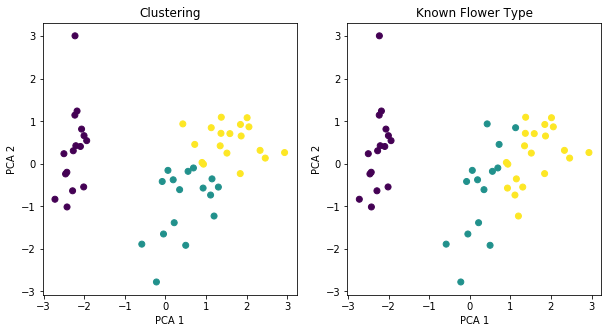

In [18]:
fig, ax  = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title("Clustering")
ax[0].scatter(train_xy[:,0],train_xy[:,1], c=train_predictions)
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title("Known Flower Type")
ax[1].scatter(train_xy[:,0],train_xy[:,1], c=train["Type"])
ax[1].set_xlabel("PCA 1")
ax[1].set_ylabel("PCA 2")
plt.show()

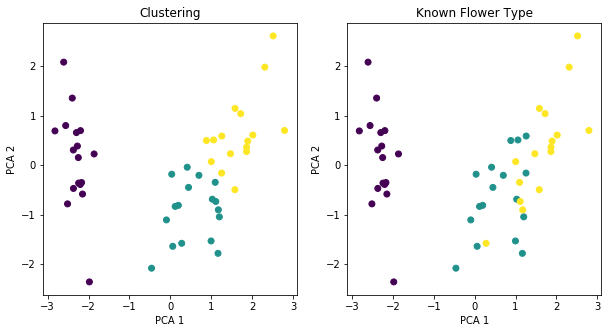

In [19]:
fig, ax  = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title("Clustering")
ax[0].scatter(val_xy[:,0],val_xy[:,1], c=val_predictions)
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title("Known Flower Type")
ax[1].scatter(val_xy[:,0],val_xy[:,1], c=val["Type"])
ax[1].set_xlabel("PCA 1")
ax[1].set_ylabel("PCA 2")
plt.show()

# Supervised learning

Can we 'learn' the relationship between the features and the type of flower?
Let's build a model that predicts what type of flower a sample is. 

We provide the 'types' as part of the training (unlike with unsupervised learning).

In [20]:
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
97,6.2,2.9,4.3,1.3,1
26,5.0,3.4,1.6,0.4,0
62,6.0,2.2,4.0,1.0,1
107,7.3,2.9,6.3,1.8,2
24,4.8,3.4,1.9,0.2,0


Let's use a random forest model.

This is essentially taking the average decision from many decision trees.

In [24]:
from sklearn.ensemble import RandomForestClassifier

#create the model
class_model = RandomForestClassifier(n_estimators=3, random_state=1)

In [27]:
from sklearn.metrics import accuracy_score

#train the model
class_model.fit(scaled_features, train["Type"])

#get some predictions
train_predictions = class_model.predict(scaled_features)
val_predictions = class_model.predict(scaled_val_features)

#look at the performance
print(accuracy_score(train["Type"],train_predictions))
print(accuracy_score(val["Type"],val_predictions))

0.98
0.92


This seems a good model, so let's retrain using both training and validation, and test it.

In [28]:
import numpy as np

#fit the model using training AND validation
class_model.fit(np.concatenate([scaled_features,scaled_val_features]),
                np.concatenate([train["Type"].values,val["Type"].values]))

#get predictions for test data
test_predictions = class_model.predict(scaled_test_features)

#get the performance for test data
print(accuracy_score(test["Type"],test_predictions))

0.92


In reality, we'd have to check we have balanced classes, and optimise the model further if it's not so good.
We would also have a look at other models that are available.

A 'big thing' in machine learning currently is the application of deep learning.

This is using a neural network, designed to behave in the same way as the human brain, to make decisions and predictions based on data.

These can be applied to supervised or unsupervised problems.

https://www.tensorflow.org/

This presentation and the code is available at:
    
<url>https://github.com/rebecca-mackenzie/intro_ml</url>

Extra code for unsupervised learning is available on here too!
    